In [2]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L32 b3

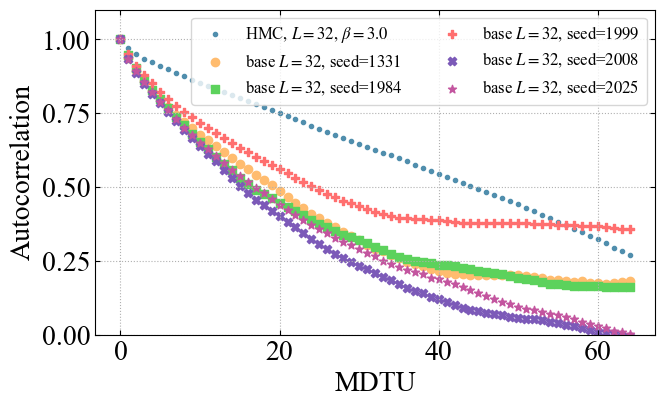

In [10]:
hmc_L32_b3_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta3.0.csv')

fthmc_base_L32_b3_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b3_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b3_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b3_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b3_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta3.0_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 3.0
volume = 32**2

hmc_L32_b3_auto = auto_from_chi(hmc_L32_b3_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L32_b3_auto_1331 = auto_from_chi(fthmc_base_L32_b3_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b3_auto_1984 = auto_from_chi(fthmc_base_L32_b3_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b3_auto_1999 = auto_from_chi(fthmc_base_L32_b3_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b3_auto_2008 = auto_from_chi(fthmc_base_L32_b3_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b3_auto_2025 = auto_from_chi(fthmc_base_L32_b3_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b3_auto)), hmc_L32_b3_auto, label='HMC, $L=32$, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1331)), fthmc_base_L32_b3_auto_1331, label='base $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1984)), fthmc_base_L32_b3_auto_1984, label='base $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_1999)), fthmc_base_L32_b3_auto_1999, label='base $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2008)), fthmc_base_L32_b3_auto_2008, label='base $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b3_auto_2025)), fthmc_base_L32_b3_auto_2025, label='base $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0., 1.1)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b3_L32_autocorrelation_L32_b3.pdf', transparent=True)
plt.show()


In [12]:

gamma_hmc = 1 / (1 - hmc_L32_b3_auto[16])

gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b3_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b3_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b3_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b3_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b3_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b3: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b3: {gamma_ratio_L32_b3_mean}")
print(f"std(16) for L32 b3: {gamma_ratio_L32_b3_std}")

deltaQ_hmc = [ abs(hmc_L32_b3_topo[i] - hmc_L32_b3_topo[i-1]) for i in range(1, len(hmc_L32_b3_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b3_topo_1331[i] - fthmc_base_L32_b3_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b3_topo_1984[i] - fthmc_base_L32_b3_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b3_topo_1999[i] - fthmc_base_L32_b3_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b3_topo_2008[i] - fthmc_base_L32_b3_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b3_topo_2025[i] - fthmc_base_L32_b3_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b3_topo_2025))]

deltaQ_hmc_L32_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b3_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b3_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b3: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b3: 2.0973140495867773, 2.3409090909090917, 1.8293904958677687, 2.4809400826446284, 2.3019628099173564
mean(16) for L32 b3: 2.2101033057851245
std(16) for L32 b3: 0.22652352706502998

>>> deltaQ
deltaQ for HMC L32 b3: 0.49474969474969477
deltaQ for FTHMC L32 b3: 0.7987789987789988, 0.6114774114774115, 0.5721611721611721, 0.8136752136752137, 0.8134310134310134
mean(deltaQ) ratio for FTHMC L32 b3: 1.4591312931885487
std(deltaQ) ratio for FTHMC L32 b3: 0.21642366979682284


### L32 b6

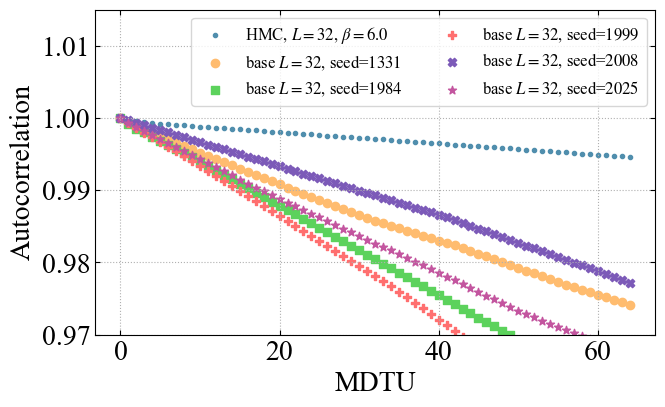

In [9]:
hmc_L32_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0.csv')

fthmc_base_L32_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L32_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L32_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L32_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L32_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L32_beta6.0_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0
volume = 32**2

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L32_b6_auto_1331 = auto_from_chi(fthmc_base_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_1984 = auto_from_chi(fthmc_base_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_1999 = auto_from_chi(fthmc_base_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_2008 = auto_from_chi(fthmc_base_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L32_b6_auto_2025 = auto_from_chi(fthmc_base_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $L=32$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1331)), fthmc_base_L32_b6_auto_1331, label='base $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1984)), fthmc_base_L32_b6_auto_1984, label='base $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_1999)), fthmc_base_L32_b6_auto_1999, label='base $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2008)), fthmc_base_L32_b6_auto_2008, label='base $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L32_b6_auto_2025)), fthmc_base_L32_b6_auto_2025, label='base $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.97, 1.015)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b3_L32_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [6]:

gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])

gamma_fthmc_1331 = 1 / (1 - fthmc_base_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L32_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L32_b6_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L32_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L32_b6_topo_1331[i] - fthmc_base_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L32_b6_topo_1984[i] - fthmc_base_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L32_b6_topo_1999[i] - fthmc_base_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L32_b6_topo_2008[i] - fthmc_base_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L32_b6_topo_2025[i] - fthmc_base_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ ratio for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 4.53125000000002, 5.937500000000025, 6.593749999999996, 3.2500000000000338, 5.531250000000021
mean(16) for L32 b6: 5.16875000000002
std(16) for L32 b6: 1.1697021522592737

>>> deltaQ
deltaQ ratio for HMC L32 b6: 0.002686202686202686
deltaQ for FTHMC L32 b6: 0.005372405372405372, 0.008302808302808303, 0.007081807081807082, 0.0031746031746031746, 0.005860805860805861
mean(deltaQ) ratio for FTHMC L32 b6: 2.2181818181818183
std(deltaQ) ratio for FTHMC L32 b6: 0.6417950034444652


### L64 b6

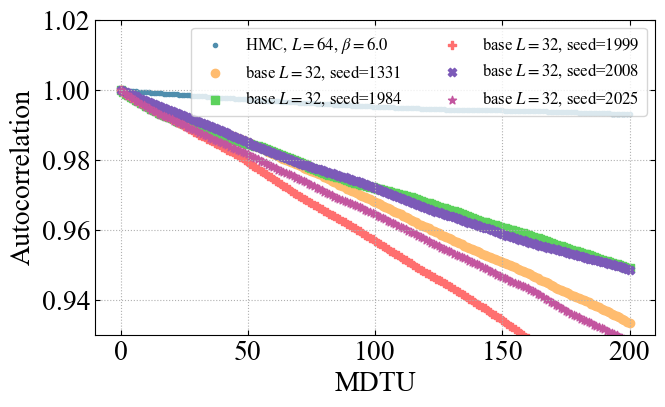

In [14]:
hmc_L64_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0.csv')

fthmc_base_L64_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L64_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L64_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L64_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L64_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_2025.csv')

max_lag = 200
beta = 6.0
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_base_L64_b6_auto_1331 = auto_from_chi(fthmc_base_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1984 = auto_from_chi(fthmc_base_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1999 = auto_from_chi(fthmc_base_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2008 = auto_from_chi(fthmc_base_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2025 = auto_from_chi(fthmc_base_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $L=64$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])

ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1331)), fthmc_base_L64_b6_auto_1331, label='base $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1984)), fthmc_base_L64_b6_auto_1984, label='base $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1999)), fthmc_base_L64_b6_auto_1999, label='base $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2008)), fthmc_base_L64_b6_auto_2008, label='base $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2025)), fthmc_base_L64_b6_auto_2025, label='base $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.93, 1.02)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/base_train_b3_L32_autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [15]:
idx = 16

gamma_hmc = 1 / (1 - hmc_L64_b6_auto[idx])

gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b6_auto_1331[idx])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b6_auto_1984[idx])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b6_auto_1999[idx])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b6_auto_2008[idx])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b6_auto_2025[idx])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(f">>> gamma ratio ({idx})")
print(f"gamma ratio ({idx}) for L64 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean({idx}) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std({idx}) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]

deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b6_topo_1331[i] - fthmc_base_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b6_topo_1984[i] - fthmc_base_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b6_topo_1999[i] - fthmc_base_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b6_topo_2008[i] - fthmc_base_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b6_topo_2025[i] - fthmc_base_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b6: 5.29999999999987, 6.718749999999817, 6.612499999999856, 4.712499999999921, 6.987499999999775
mean(16) for L64 b6: 6.066249999999847
std(16) for L64 b6: 0.8936022605163442

>>> deltaQ
deltaQ for HMC L64 b6: 0.005860805860805861
deltaQ for FTHMC L64 b6: 0.01904761904761905, 0.022954822954822957, 0.023931623931623933, 0.013431013431013432, 0.024664224664224663
mean(deltaQ) ratio for FTHMC L64 b6: 3.55
std(deltaQ) ratio for FTHMC L64 b6: 0.7107312353406798
